In [35]:
from fastai.tabular import *
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV,KFold, cross_val_score
import torch
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack
from tqdm import tqdm
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
benign_data_path = '/content/drive/MyDrive/[졸프]데이터_csv/benign_data_1030.csv'
malicious_data_path = '/content/drive/MyDrive/[졸프]데이터_csv/malicious_data_1030.csv'

benign_data = pd.read_csv(benign_data_path)
malicious_data = pd.read_csv(malicious_data_path)

In [ ]:
benign_data

,url,label,url_length,character_count,https,ttl,name_server,IP/email,short_url,file_extension,ns_domain_match
0,https://montpelier.org,0,22,3,1,600.0,"['ns01.domaincontrol.com', 'ns02.domaincontrol...",0,0,0,0.0
1,https://notion.com,0,18,3,1,300.0,"['woz.ns.cloudflare.com', 'dana.ns.cloudflare....",0,0,0,0.0
2,https://icanvas.com,0,19,3,1,86400.0,"['pdns01.domaincontrol.com', 'pdns02.domaincon...",0,0,0,0.0
3,https://alloy.com,0,17,3,1,300.0,"['jack.ns.cloudflare.com', 'nola.ns.cloudflare...",0,0,0,0.0
4,https://ynhhs.org,0,17,3,1,300.0,"['ns21.constellix.com', 'ns11.constellix.com',...",0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149702,http://hzhjuli.com,0,18,3,0,600.0,"['jm1.dns.com', 'jm2.dns.com']",0,0,0,0.0
149703,http://tataaig.com,0,18,3,0,14400.0,"['ns-1083.awsdns-07.org', 'ns-1698.awsdns-20.c...",0,0,0,0.0
149704,http://chocolatemoosey.com,0,26,3,0,300.0,"['elisa.ns.cloudflare.com', 'yisroel.ns.cloudf...",0,0,0,0.0
149705,http://iptvsmarters.com,0,23,3,0,300.0,"['salvador.ns.cloudflare.com', 'christina.ns.c...",0,0,0,0.0


In [ ]:
malicious_data

,url,label,url_length,character_count,https,ttl,name_server,IP/email,short_url,file_extension,ns_domain_match
0,https://donate.do/h73t,1,22,4,1,3600.0,"['ns1.101domain.com', 'ns2.101domain.com', 'ns...",0,0,0,0.0
1,http://gilo.iszty.skin,1,22,4,0,NaN,[],0,0,0,NaN
2,http://han.gl/UwxiZ,1,19,4,0,300.0,"['tony.ns.cloudflare.com', 'jill.ns.cloudflare...",0,0,0,0.0
3,http://sn6d.senlo.plus,1,22,4,0,NaN,[],0,0,0,NaN
4,http://hgfdh.bsone.kr,1,21,4,0,NaN,[],0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94062,http://ip193.ip-146-59-161.eu:7358/GE-en.zip,1,44,10,0,NaN,[],0,0,1,NaN
94063,http://91.92.243.32/kvro/venture07.png,1,38,8,0,NaN,[],1,0,1,NaN
94064,http://avastcv.com/Avastavv.apk,1,31,5,0,NaN,[],0,0,1,NaN
94065,https://raw.githubusercontent.com/mmdfgg/2023/...,1,92,13,1,1197.0,[],0,1,1,NaN


In [ ]:
data = pd.concat([benign_data, malicious_data],axis=0, ignore_index=True)

In [ ]:
data

,url,label,url_length,character_count,https,ttl,name_server,IP/email,short_url,file_extension,ns_domain_match
0,https://montpelier.org,0,22,3,1,600.0,"['ns01.domaincontrol.com', 'ns02.domaincontrol...",0,0,0,0.0
1,https://notion.com,0,18,3,1,300.0,"['woz.ns.cloudflare.com', 'dana.ns.cloudflare....",0,0,0,0.0
2,https://icanvas.com,0,19,3,1,86400.0,"['pdns01.domaincontrol.com', 'pdns02.domaincon...",0,0,0,0.0
3,https://alloy.com,0,17,3,1,300.0,"['jack.ns.cloudflare.com', 'nola.ns.cloudflare...",0,0,0,0.0
4,https://ynhhs.org,0,17,3,1,300.0,"['ns21.constellix.com', 'ns11.constellix.com',...",0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243769,http://ip193.ip-146-59-161.eu:7358/GE-en.zip,1,44,10,0,NaN,[],0,0,1,NaN
243770,http://91.92.243.32/kvro/venture07.png,1,38,8,0,NaN,[],1,0,1,NaN
243771,http://avastcv.com/Avastavv.apk,1,31,5,0,NaN,[],0,0,1,NaN
243772,https://raw.githubusercontent.com/mmdfgg/2023/...,1,92,13,1,1197.0,[],0,1,1,NaN


In [ ]:
data_fillna = data.fillna(-1)

In [ ]:
data_fillna

,url,label,url_length,character_count,https,ttl,name_server,IP/email,short_url,file_extension,ns_domain_match
0,https://montpelier.org,0,22,3,1,600.0,"['ns01.domaincontrol.com', 'ns02.domaincontrol...",0,0,0,0.0
1,https://notion.com,0,18,3,1,300.0,"['woz.ns.cloudflare.com', 'dana.ns.cloudflare....",0,0,0,0.0
2,https://icanvas.com,0,19,3,1,86400.0,"['pdns01.domaincontrol.com', 'pdns02.domaincon...",0,0,0,0.0
3,https://alloy.com,0,17,3,1,300.0,"['jack.ns.cloudflare.com', 'nola.ns.cloudflare...",0,0,0,0.0
4,https://ynhhs.org,0,17,3,1,300.0,"['ns21.constellix.com', 'ns11.constellix.com',...",0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243769,http://ip193.ip-146-59-161.eu:7358/GE-en.zip,1,44,10,0,-1.0,[],0,0,1,-1.0
243770,http://91.92.243.32/kvro/venture07.png,1,38,8,0,-1.0,[],1,0,1,-1.0
243771,http://avastcv.com/Avastavv.apk,1,31,5,0,-1.0,[],0,0,1,-1.0
243772,https://raw.githubusercontent.com/mmdfgg/2023/...,1,92,13,1,1197.0,[],0,1,1,-1.0


In [ ]:
X = data_fillna[['url_length','character_count','https','ttl', 'ns_domain_match', 'IP/email', 'short_url','file_extension']]
y = data_fillna['label']

In [ ]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
243769,1
243770,1
243771,1
243772,1


In [ ]:
additional_features = X[['ttl']].values
scaler = StandardScaler()
additional_features = scaler.fit_transform(additional_features)
# additional_features를 DataFrame으로 변환 (열 이름 지정)
additional_features_df = pd.DataFrame(additional_features, columns=['ttl_scaled'])

# X와 additional_features_df를 수평으로 결합
X_combined = pd.concat([X, additional_features_df], axis=1)

# 결과 확인
print(X_combined.head())

   url_length  character_count  https      ttl  ns_domain_match  IP/email  \
0          22                3      1    600.0              0.0         0   
1          18                3      1    300.0              0.0         0   
2          19                3      1  86400.0              0.0         0   
3          17                3      1    300.0              0.0         0   
4          17                3      1    300.0              0.0         0   

   short_url  file_extension  ttl_scaled  
0          0               0   -0.194590  
1          0               0   -0.209532  
2          0               0    4.078992  
3          0               0   -0.209532  
4          0               0   -0.209532  


In [ ]:
X_combined.drop(columns=['ttl'], inplace=True)

In [ ]:
X_combined

,url_length,character_count,https,ns_domain_match,IP/email,short_url,file_extension,ttl_scaled
0,22,3,1,0.0,0,0,0,-0.194590
1,18,3,1,0.0,0,0,0,-0.209532
2,19,3,1,0.0,0,0,0,4.078992
3,17,3,1,0.0,0,0,0,-0.209532
4,17,3,1,0.0,0,0,0,-0.209532
...,...,...,...,...,...,...,...,...
243769,44,10,0,-1.0,0,0,1,-0.224525
243770,38,8,0,-1.0,1,0,1,-0.224525
243771,31,5,0,-1.0,0,0,1,-0.224525
243772,92,13,1,-1.0,0,1,1,-0.164854


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2,random_state=42)

로지스틱회귀

In [36]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('roc_auc: ',roc_auc_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.9601681878781664
roc_auc:  0.956126350677232
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     29745
           1       0.96      0.94      0.95     19010

    accuracy                           0.96     48755
   macro avg       0.96      0.96      0.96     48755
weighted avg       0.96      0.96      0.96     48755



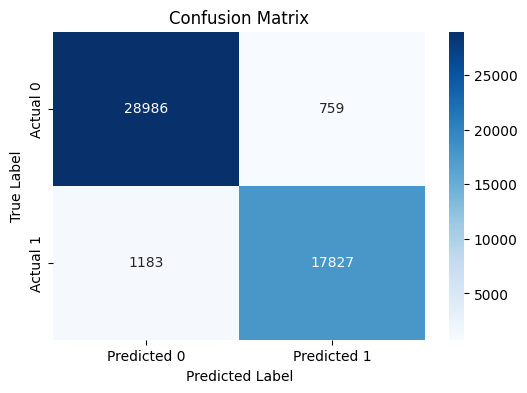

In [ ]:
# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

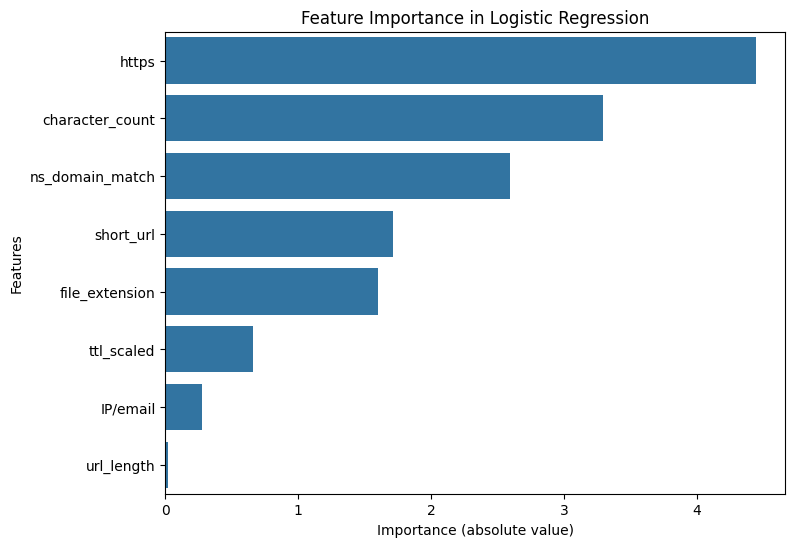

In [ ]:
# Feature 중요도 추출 및 시각화
feature_importance = model.coef_[0]
feature_names = X_combined.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 절대값을 기준으로 정렬
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Absolute Importance', y='Feature', data=importance_df, dodge=False)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Importance (absolute value)')
plt.ylabel('Features')
plt.show()


결정트리

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 모델 초기화
model_dt = DecisionTreeClassifier(random_state=42)

# 모델 학습
model_dt.fit(X_train, y_train)

# 예측
y_pred_dt = model_dt.predict(X_test)

# 평가
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('roc_auc: ',roc_auc_score(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))


Accuracy: 0.9876115270228695
roc_auc:  0.9863063684665262
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29745
           1       0.99      0.98      0.98     19010

    accuracy                           0.99     48755
   macro avg       0.99      0.99      0.99     48755
weighted avg       0.99      0.99      0.99     48755



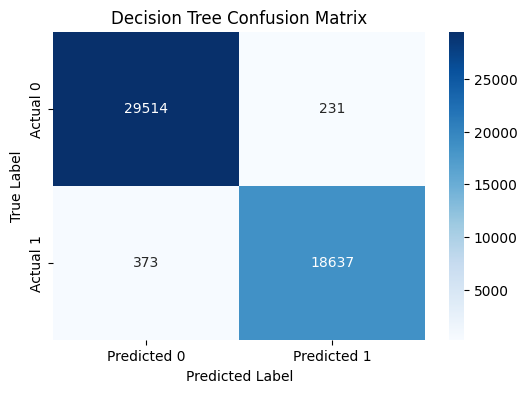

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측
y_pred_dt = model_dt.predict(X_test)

# 혼동 행렬 계산
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()


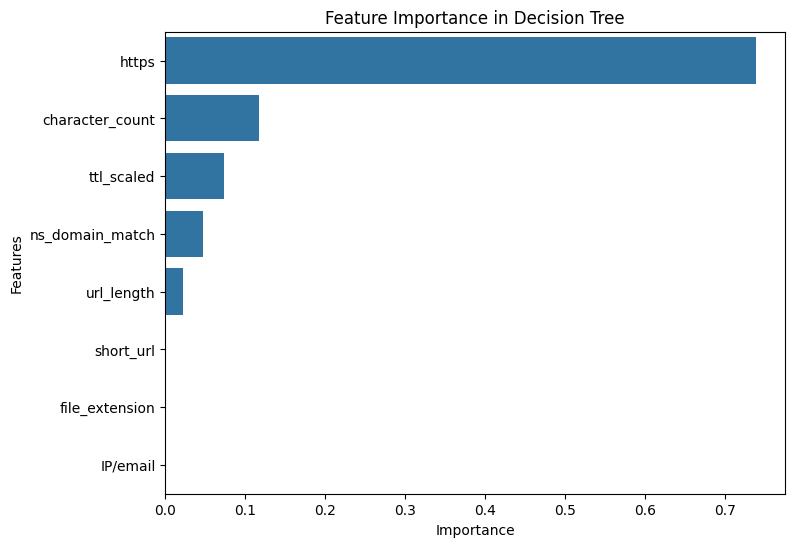

In [39]:
# Feature 중요도 추출 및 시각화
feature_importances = model_dt.feature_importances_
feature_names = X_combined.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, dodge=False)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


랜덤포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier

# 모델 초기화
model_rf = RandomForestClassifier(random_state=42)

# 모델 학습
model_rf.fit(X_train, y_train)

# 예측
y_pred_rf = model_rf.predict(X_test)

# 평가
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('roc_auc: ',roc_auc_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))


Accuracy: 0.9882883806789047
roc_auc:  0.9871933174929209
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29745
           1       0.99      0.98      0.98     19010

    accuracy                           0.99     48755
   macro avg       0.99      0.99      0.99     48755
weighted avg       0.99      0.99      0.99     48755



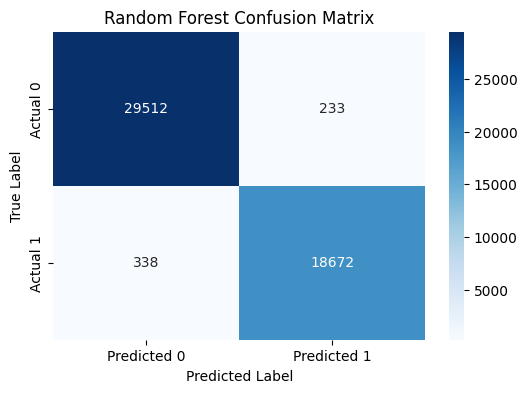

In [ ]:
# 예측
y_pred_rf = model_rf.predict(X_test)

# 혼동 행렬 계산
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


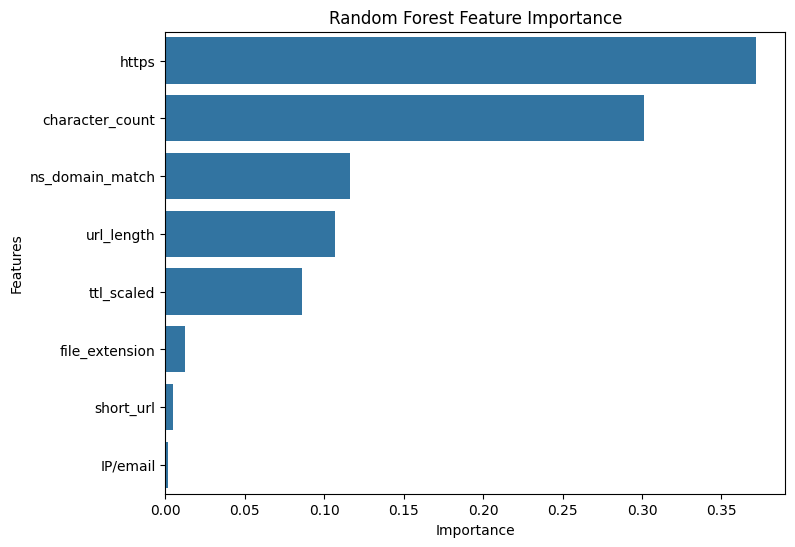

In [ ]:
# 특성 중요도 추출
feature_importance_rf = model_rf.feature_importances_

feature_names = X_combined.columns
# 중요도 DataFrame 생성
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})

# 절대값 기준으로 정렬
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()




SVM

In [ ]:
from sklearn.svm import SVC

# 모델 초기화
model_svm = SVC(kernel='linear', random_state=42)

# 모델 학습
model_svm.fit(X_train, y_train)

# 예측
y_pred_svm = model_svm.predict(X_test)

# 평가
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))


In [ ]:
# 예측
y_pred_svm = model_svm.predict(X_test)

# 혼동 행렬 계산
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 초기화
model_knn = KNeighborsClassifier()

# 모델 학습
model_knn.fit(X_train, y_train)

# 예측
y_pred_knn = model_knn.predict(X_test)

# 평가
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))
